In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Customers.csv')

In [4]:
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


### BASIC EXPLORATORY DATA ANALYSIS

In [5]:
print('Shape: ', df.shape)
print('\nColumns: ', df.columns)
print('\nData Types:')
print(df.dtypes)


Shape:  (200, 4)

Columns:  Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

Data Types:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [6]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

In [22]:
df['SignupYear'] = df['SignupDate'].dt.year
df['SignupMonth'] = df['SignupDate'].dt.month

In [23]:
print('Missing Values: ')
print(df.isnull().sum())

Missing Values: 
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
SignupYear      0
SignupMonth     0
dtype: int64


In [24]:
print("Unique Values in Each Column:\n")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Unique Values in Each Column:

CustomerID: 200 unique values
CustomerName: 200 unique values
Region: 4 unique values
SignupDate: 179 unique values
SignupYear: 3 unique values
SignupMonth: 12 unique values


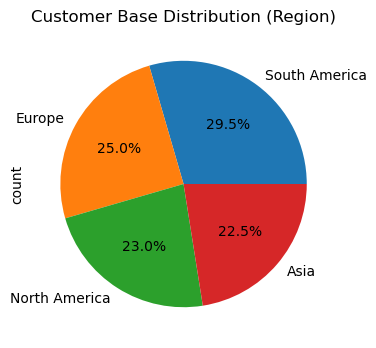

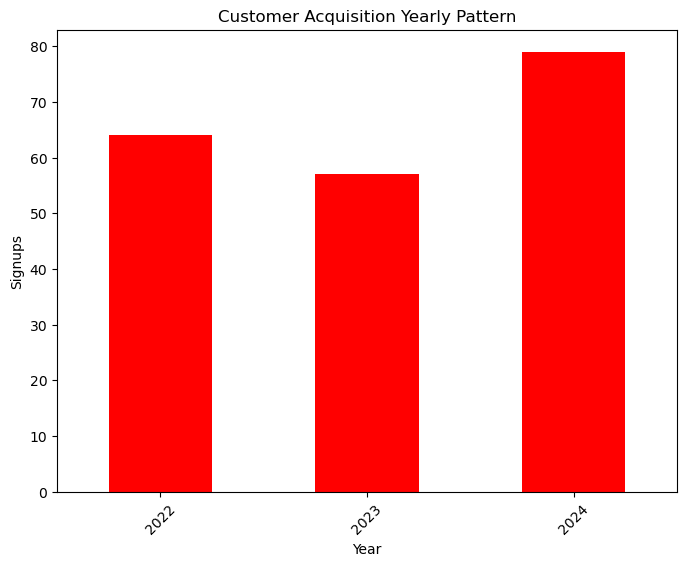

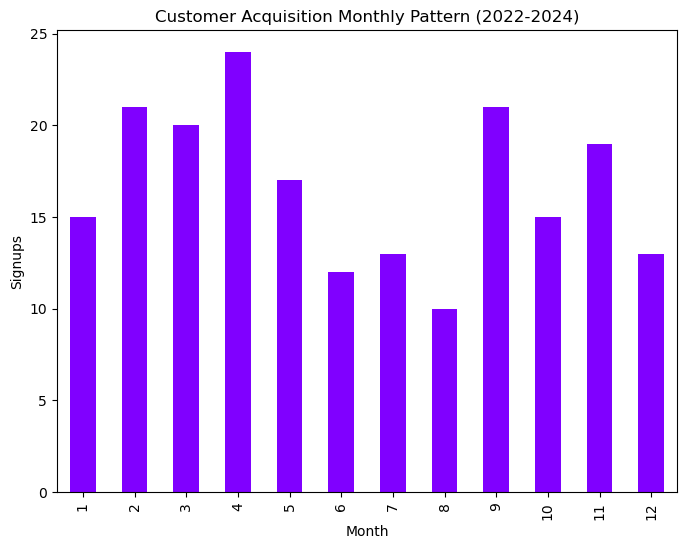

<Figure size 800x600 with 0 Axes>

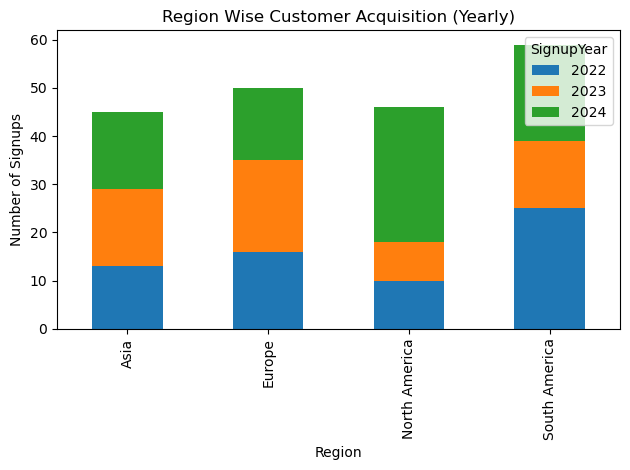

In [60]:
plt.figure(figsize=(6,4))
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Base Distribution (Region)')


plt.figure(figsize=(8,6))
df['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar', colormap='autumn')
plt.title('Customer Acquisition Yearly Pattern')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Signups')

plt.figure(figsize=(8,6))
df['SignupDate'].dt.month.value_counts().sort_index().plot(kind='bar', colormap='rainbow')
plt.title('Customer Acquisition Monthly Pattern (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Signups')

plt.figure(figsize=(8,6))
region_year = pd.crosstab(df['Region'], df['SignupYear'])
region_year.plot(kind='bar', stacked=True)
plt.title('Region Wise Customer Acquisition (Yearly)')
plt.xlabel('Region')
plt.ylabel('Number of Signups')


plt.tight_layout()
plt.show()

### Monthly SignUp Trend (2022-2024)

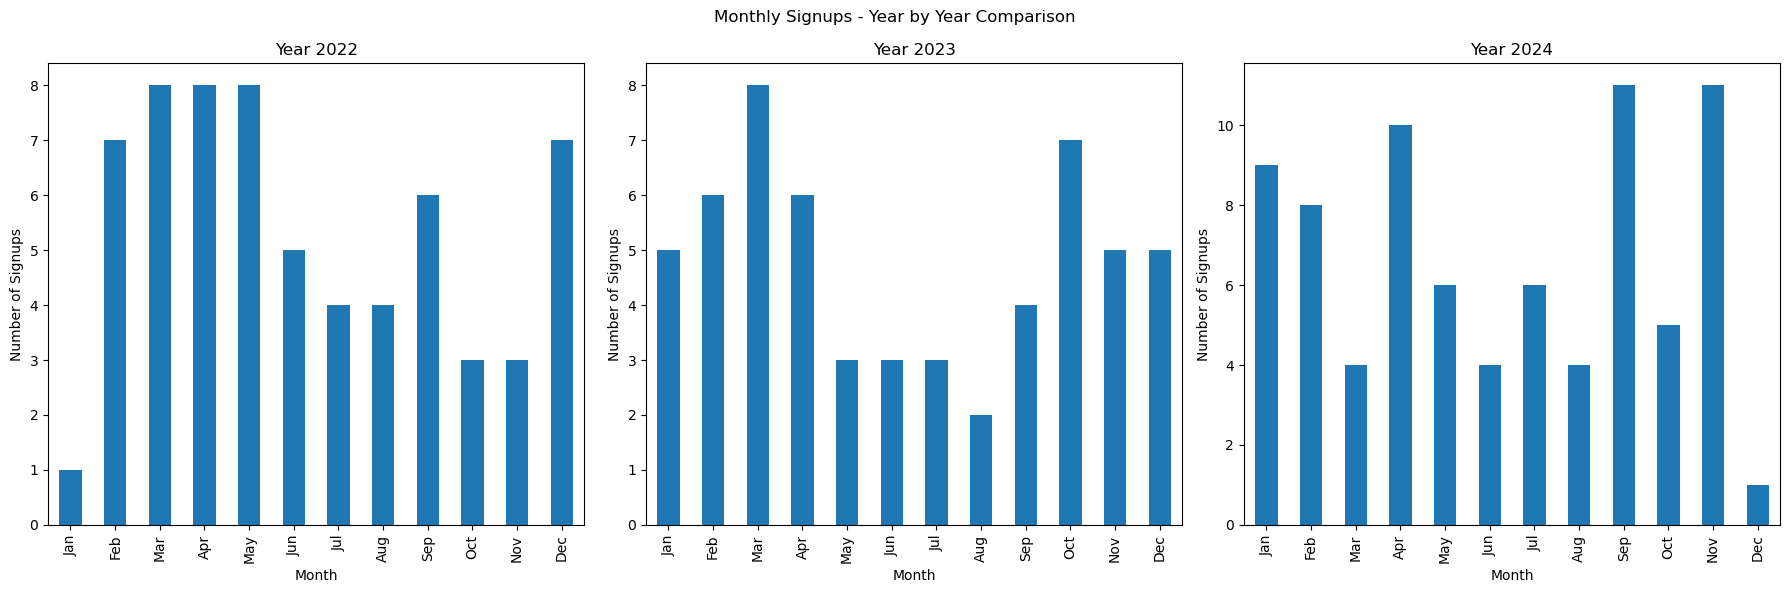

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Monthly Signups - Year by Year Comparison')

for year, ax in zip([2022, 2023, 2024], axes):
    year_data = df[df['SignupYear'] == year]
    monthly_counts = year_data['SignupMonth'].value_counts().sort_index()
    monthly_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Signups')
    ax.set_xticks(range(12))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
plt.tight_layout()
plt.show()

### Distribution of signups over time (Merged Plot). Extrapolation of Customer Acquisition Yearly Bar plot

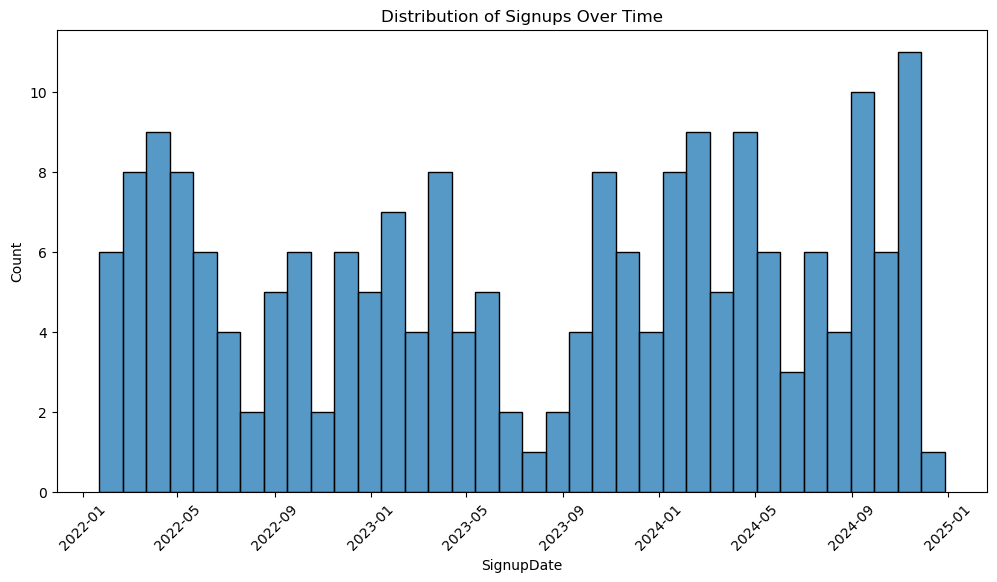

In [80]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SignupDate', bins=36)
plt.title('Distribution of Signups Over Time')
plt.xticks(rotation=45)
plt.show()


# BUSINESS INSIGHTS

## 1. Customer base distribution: Fairly distributed across regions. South America is the dominant customer base due to effective marketing strategies and acceptance. Asia and North America have slightly lower customer bases, there is untapped potential and a need for specific growth strategies or leveraging South American strategies in these regions.

## 2. Customer Acquisition (Yearly Pattern): There is a non linear trend in acquiring customers from 2022-2024 (acceleration-deceleration). 2022 saw an increase initially followed by a decline in growth. 2023 saw the least number of customers acquired - volatile growth(significant months are March and Sept). 2024 saw highest customer acquisition with significant monthly growth, indicating accelerating business.

## 3. Customer Acquisition (Monthly Pattern): Customer Signups show higher activity in Q1(Jan-Mar) and Q4(Oct-Dec) and lower activity in Q2 and Q3 (Apr-Sept). Some months consistenly show higher signup rates. There is a need for specific marketing campaigns during the slower periods of Q2 AND Q3.

## 4. Region Wise Customer Acquisiton (Yearly): Asia shows a slow but steady and consisten growth over the years. North America shows a very rapid business growth in 2024. Europe shows a very volatile sign pattern with a sudden increase and decrease. South America shows a slightly inconsistent growth from 2023-2024 but an overall upward growth over the years.

## 5. Business has expanded from its initial market to get more global presence. Diversity of customer base has increased over time, reducing dependency on a single region. Recent growth in Asia and North America in 2024 indicate successful market entry strategies in these regions.